# Transformée de Laplace inverse

## Introduction

La résolution d'équations différentielles linéaires peut s'effectuer en s'aidant de la transformée de Laplace. Via cette méthode, on accède dans un premier temps à la transformée de Laplace de la solution, qui se présente pour l'essentiel sous la forme d'une fraction rationnelle d'une variable complexe $p$.

Pour revenir à l'expression temporelle de la solution, il faut procéder à la **décomposition en éléments simples** de la fraction rationnelle en $p$, de sorte qu'apparaissent des termes élémentaires de la forme $\dfrac{K}{(p-a)^n}$ (dans le corps des complexes) pour lesquels l'expression temporelle associée $K\dfrac{t^{n-1}e^{at}\theta(t)}{(n-1)!}$ est connue.

L'idée ici est d'illustrer les méthodes de calcul via le package **sympy** de calcul symbolique. Mais il reste préférable de pouvoir **mener ces calculs avec un crayon et un papier**.

La validation s'effectuera avec la fonction **impulse** du package **scipy.signal**.

## Les packages utiles

In [1]:
import sympy as sp
import numpy as np
from scipy.signal import impulse
import matplotlib.pyplot as plt
from IPython.display import display, Math

## Définition de $H(p)$ sous forme littérale

In [2]:
p, t = sp.symbols('p, t')
P = sp.IndexedBase('P')
Num = 5*p**2-1.5*p+0.1
Pn = [(P[1], -0.5), (P[2], -0.8), (P[3], -0.7)]
OPn = [1, 3, 1]

In [3]:
H = Num
for k in range(len(Pn)):
    H = H/(p - Pn[k][0])**OPn[k]
display(Math('H(p)='+sp.latex(H)))
display(Math('H(p)='+sp.latex(H.subs(Pn))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## La fonction qui travaille sur l'expression littérale de $H(p)$, avec les pôles sous forme numérique

In [4]:
def tlinv(Num, Pn, OPn, p, t):
    A = sp.IndexedBase('A')
    y = sp.symbols('y')
    An, h, tl = [], 0, 0
    polyP = Num
    for k in range(len(Pn)):
        polyB = sp.Poly(1, p)
        for m in range(len(Pn)):
            if m != k:
                polyB = polyB*(p - Pn[m][1])**OPn[m]
        polyB = sp.Poly(polyB.subs(p, y+Pn[k][1]), y)
        polyR = sp.Poly(polyP.subs(p, y+Pn[k][1]), y)
        polyQ = sp.Poly(0, y)
        for m in range(OPn[k]):
            q = polyR.coeff_monomial(y**m)/polyB.coeff_monomial(y**0)
            polyQ = sp.Poly(polyQ+q*y**m, y)
            polyR = sp.Poly(polyR-q*polyB*y**m, y)
        display(Math(sp.latex(Pn[k][0]) + '=' +
                f'{Pn[k][1]}'+'\\quad\\text{ordre}='+f'{OPn[k]}'))
        display(Math('R(y)='+sp.latex(polyR.as_expr().n(4))))
        display(Math('Q(y)='+sp.latex(polyQ.as_expr().n(4))))
        for m in range(OPn[k]):
            Anum = polyQ.coeff_monomial(y**(OPn[k]-1-m))
            An.append((A[Pn[k][0].indices[0], m+1], Anum.simplify()))
            h = h+A[Pn[k][0].indices[0], m+1]*t**m * \
                sp.exp(Pn[k][0]*t)/sp.factorial(m)
            tl = tl+A[Pn[k][0].indices[0], m+1]/(p - Pn[k][0])**(m+1)
    return An, h, tl

## Test de la fonction pour obtenir $h(t)$ sous forme littérale, avec les coefficients sous forme littérale, puis numérique

In [5]:
An, h, tl = tlinv(Num, Pn, OPn, p, t)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [6]:
display(Math('h(t)='+sp.latex(h)))
display(Math('h(t)='+sp.latex(h.subs(An).subs(Pn).n(4))))
display(Math('H(p)='+sp.latex(tl)))
display(Math('H(p)='+sp.latex(tl.subs(An).subs(Pn).n(4))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Test de la méthode **apart** (ne fonctionne pas avec l'exemple)

In [7]:
display(H.subs(Pn).apart(p).n(4))

0.9709*(1.0*p - 0.2)*(1.0*p - 0.1)/(0.1942*p**5 + 0.699*p**4 + 1.0*p**3 + 0.7099*p**2 + 0.2498*p + 0.0348)

## Test de la méthode **inverse_laplace_transform** (ne fonctionne pas avec l'exemple)

In [8]:
display(sp.inverse_laplace_transform(H.subs(Pn), p, t).n(4))

-0.2913*((-8.055e+10 + 1.396e+11*I)*(-1.632e-5*exp(-0.799990578167577*t)*sin(1.6321106082868e-5*t) + 0.8*I*exp(-0.799990578167577*t)*sin(1.6321106082868e-5*t) - 0.8*exp(-0.799990578167577*t)*cos(1.6321106082868e-5*t) - 1.632e-5*I*exp(-0.799990578167577*t)*cos(1.6321106082868e-5*t)) + (-8.055e+10 - 1.396e+11*I)*(-1.632e-5*exp(-0.799990578167577*t)*sin(1.6321106082868e-5*t) - 0.8*I*exp(-0.799990578167577*t)*sin(1.6321106082868e-5*t) - 0.8*exp(-0.799990578167577*t)*cos(1.6321106082868e-5*t) + 1.632e-5*I*exp(-0.799990578167577*t)*cos(1.6321106082868e-5*t)) - 1.289e+11*exp(-0.800018843665528*t) + 1.803e+4*exp(-0.699999999999307*t) - 476.9*exp(-0.500000000000011*t))*Heaviside(t) + 0.1*((-1.564e+10 + 2.71e+10*I)*(-I*exp(-0.799990578167577*t)*sin(1.6321106082868e-5*t) + exp(-0.799990578167577*t)*cos(1.6321106082868e-5*t)) + (-1.564e+10 - 2.71e+10*I)*(I*exp(-0.799990578167577*t)*sin(1.6321106082868e-5*t) + exp(-0.799990578167577*t)*cos(1.6321106082868e-5*t)) + 3.128e+10*exp(-0.800018843665528*t

## Utilisation de la fonction **impulse** du package **scipy.signal** pour validation

In [9]:
Den = sp.fraction(H)[1].subs(Pn)
coeffN = np.array([sp.Poly(Num, p).coeff_monomial(p**k)
                  for k in range(sp.degree(Num), -1, -1)], dtype=complex).real
coeffD = np.array([sp.Poly(Den, p).coeff_monomial(p**k)
                  for k in range(np.sum(OPn), -1, -1)], dtype=complex).real
display(Math('N(p)='+sp.latex(sp.Poly(Num, p).as_expr())))
print('coeffN = ', coeffN)
display(Math('D(p)='+sp.latex(sp.Poly(Den, p).as_expr())))
print('coeffD = ', coeffD)

<IPython.core.display.Math object>

coeffN =  [ 5.  -1.5  0.1]


<IPython.core.display.Math object>

coeffD =  [1.     3.6    5.15   3.656  1.2864 0.1792]


## Bilan avec comparaison

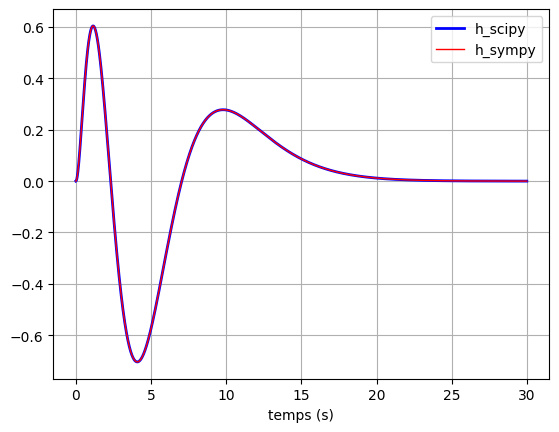

In [10]:
tps = np.arange(0, 30, 0.01)
_, h_scipy = impulse((coeffN, coeffD), T=tps)
h_sympy = sp.lambdify(t, h.subs(An).subs(Pn), 'numpy')(tps).real
plt.plot(tps, h_scipy, 'b', lw=2, label='h_scipy')
plt.plot(tps, h_sympy, 'r', lw=1, label='h_sympy')
plt.grid('on')
plt.xlabel('temps (s)')
plt.legend()
plt.show()

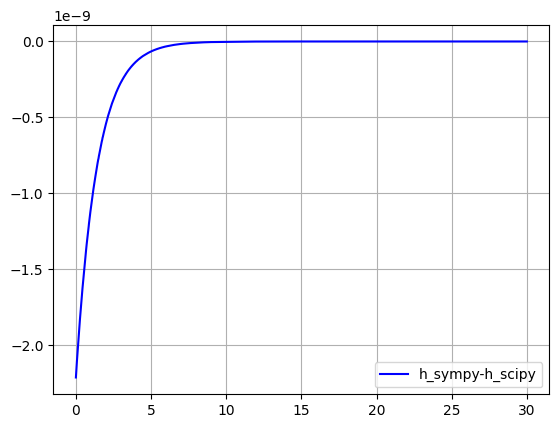

In [11]:
plt.plot(tps, h_sympy-h_scipy, 'b', label='h_sympy-h_scipy')
plt.grid('on')
plt.legend()
plt.show()

## Méthodes de calcul

Voir la page Wikipédia [Décomposition en éléments simples](https://fr.wikipedia.org/wiki/D%C3%A9composition_en_%C3%A9l%C3%A9ments_simples#%C3%89l%C3%A9ments_simples_associ%C3%A9s_%C3%A0_un_p%C3%B4le_multiple) à la rubrique **Éléments simples associés à un pôle multiple**.
